<a href="https://colab.research.google.com/github/Daryldactyl/CNN_Practice/blob/main/CNN_Food101_Experimentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to Convvolutional Neural Networks and Computer Vision with TensorFlow

Computer Vision is the practice of writing algorithms which can discover patterns

## Get the data

The images we're working with are form the Food101 dataset (101 differrent classes of food): https://www.kaggle.com/dansbecker/food-101

However we've modified it to only use two classes (pizza and steak) using the image data modification notebook:
https://github.com/mrdbourke/tensorflow-deep-learning/blob/main/extras/image_data_modification.ipynb

We start with a smaller dataset so we can experiment quickly and figure what works (or better yet what doesn't work) before scaling up

In [1]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

#Unzip the downloaded file
zip_ref = zipfile.ZipFile('pizza_steak.zip')
zip_ref.extractall()
zip_ref.close()

--2024-03-13 18:49:39--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.2.207, 74.125.137.207, 2607:f8b0:4023:c0d::cf, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.2.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip.1’

pizza_steak.zip.1   100%[===================>] 104.47M   156MB/s    in 0.7s    

2024-03-13 18:49:40 (156 MB/s) - ‘pizza_steak.zip.1’ saved [109540975/109540975]




## Inspect the data (become one with it)

A very crucial step at the beggining of any ML project is becoming one with the dataclass_transform

For a computer vision project.... this usually means visualizing many samples of you dataset

In [2]:
import os

#Walk throught the pizza_steak directory and list number of files

for dirpath, dirnames, filenames in os.walk('pizza_steak'):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

There are 2 directories and 0 images in 'pizza_steak'.
There are 2 directories and 0 images in 'pizza_steak/test'.
There are 0 directories and 250 images in 'pizza_steak/test/steak'.
There are 0 directories and 250 images in 'pizza_steak/test/pizza'.
There are 2 directories and 0 images in 'pizza_steak/train'.
There are 0 directories and 750 images in 'pizza_steak/train/steak'.
There are 0 directories and 750 images in 'pizza_steak/train/pizza'.


To visualize our images, first let's get the class names programmatically

In [3]:
# Get the class names
import pathlib
import numpy as np
data_dir = pathlib.Path('pizza_steak/train')
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['pizza' 'steak']


In [4]:
#Let's visuliaze our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  #Setup the target directory (we'll view images from here)
  target_folder = target_dir + target_class

  #Get a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  #Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + '/' + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis('off')

  print(f'Image Shape: {img.shape}')
  return img

Image Shape: (512, 512, 3)


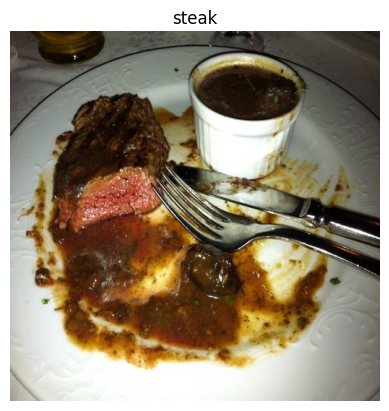

In [5]:
#View a random image from the training dataset
img = view_random_image(target_dir = 'pizza_steak/train/',
                        target_class='steak')

Image Shape: (512, 382, 3)


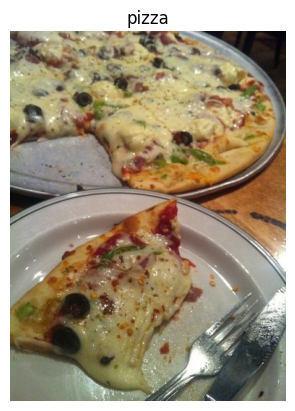

In [6]:
img = view_random_image(target_dir='pizza_steak/train/',
                        target_class='pizza')

## An End-to-End example

Let's build a convolutional neural net to find patterns in our images, more specifically:
  * Load our images
  * Preprocess our images
  * Build a CNN to find patterns in our images
  * Compile our CNN
  * Fit the CNN to our training data

In [7]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [8]:
tf.random.set_seed(42)

#Preprocess the data
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

#Setup path to data directories
train_dir = 'pizza_steak/train'
test_dir = 'pizza_steak/test'

#Import the data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode = 'binary',
                                               seed=42)

#Build a CNN model (same as the Tiny VGG on the CNN explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10, kernel_size=3, activation = 'relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.Conv2D(10, 3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

#Compile our CNN
model_1.compile(loss = 'binary_crossentropy',
                optimizer= tf.keras.optimizers.Adam(),
                metrics = ['accuracy'])

#Fit the model
# history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


## Using the same model as before

Let's replicate the model we've built in a previous secton to see if it works with our image data.

The model we're building is from the TensorFlow playground

In [25]:
tf.random.set_seed(42)

model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_2.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(learning_rate=.00013), metrics=['accuracy'])

history_2 = model_2.fit(train_data, epochs=25, steps_per_epoch=len(train_data), validation_data = valid_data, validation_steps=len(valid_data))

Epoch 1/25
47/47 [==============================] - 8s 117ms/step - loss: 0.6625 - accuracy: 0.5080 - val_loss: 0.6252 - val_accuracy: 0.5280
Epoch 2/25
47/47 [==============================] - 6s 118ms/step - loss: 0.6021 - accuracy: 0.7067 - val_loss: 0.5732 - val_accuracy: 0.7260
Epoch 3/25
47/47 [==============================] - 6s 132ms/step - loss: 0.5493 - accuracy: 0.7700 - val_loss: 0.5014 - val_accuracy: 0.7880
Epoch 4/25
47/47 [==============================] - 6s 137ms/step - loss: 0.4838 - accuracy: 0.7893 - val_loss: 0.4428 - val_accuracy: 0.7840
Epoch 5/25
47/47 [==============================] - 6s 131ms/step - loss: 0.4531 - accuracy: 0.7973 - val_loss: 0.4017 - val_accuracy: 0.8140
Epoch 6/25
47/47 [==============================] - 5s 113ms/step - loss: 0.4370 - accuracy: 0.8033 - val_loss: 0.3973 - val_accuracy: 0.8260
Epoch 7/25
47/47 [==============================] - 6s 126ms/step - loss: 0.4179 - accuracy: 0.8153 - val_loss: 0.3787 - val_accuracy: 0.8340
Epoch 

In [22]:
tf.random.set_seed(42)
#Find the optimal learning rate
model_3 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(pool_size=2, padding='valid'),
    tf.keras.layers.Conv2D(10,3,activation='relu'),
    tf.keras.layers.Conv2D(10,3, activation='relu'),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(10, activation='relu'),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

model_3.compile(loss='binary_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=['accuracy'])

#CALLBACK
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

history_3 = model_3.fit(train_data, epochs=25, steps_per_epoch=len(train_data), callbacks=[lr_scheduler])

Epoch 1/25
47/47 [==============================] - 6s 85ms/step - loss: 0.6630 - accuracy: 0.6507 - lr: 1.0000e-04
Epoch 2/25
47/47 [==============================] - 5s 99ms/step - loss: 0.5700 - accuracy: 0.7380 - lr: 1.1220e-04
Epoch 3/25
47/47 [==============================] - 5s 102ms/step - loss: 0.5225 - accuracy: 0.7507 - lr: 1.2589e-04
Epoch 4/25
47/47 [==============================] - 5s 116ms/step - loss: 0.4832 - accuracy: 0.7713 - lr: 1.4125e-04
Epoch 5/25
47/47 [==============================] - 4s 87ms/step - loss: 0.4553 - accuracy: 0.7787 - lr: 1.5849e-04
Epoch 6/25
47/47 [==============================] - 4s 90ms/step - loss: 0.4103 - accuracy: 0.8133 - lr: 1.7783e-04
Epoch 7/25
47/47 [==============================] - 4s 91ms/step - loss: 0.4117 - accuracy: 0.8200 - lr: 1.9953e-04
Epoch 8/25
47/47 [==============================] - 4s 84ms/step - loss: 0.3920 - accuracy: 0.8193 - lr: 2.2387e-04
Epoch 9/25
47/47 [==============================] - 5s 102ms/step - lo

In [23]:
tf.argmin(history_3.history['loss'])

<tf.Tensor: shape=(), dtype=int64, numpy=22>

In [24]:
print(history_3.history['loss'][22])
print(history_3.history['lr'][22])

0.05213189870119095
0.0012589254


In [27]:
tf.random.set_seed(42)

model_4 = tf.keras.Sequential([
  tf.keras.layers.Conv2D(10, 3, activation='relu', input_shape=(224,224,3)),
  tf.keras.layers.Conv2D(10,3,activation='relu'),
  tf.keras.layers.MaxPool2D(2, padding='valid'),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(25, activation='relu'),
  tf.keras.layers.Dense(50, activation='relu'),
  tf.keras.layers.Dense(25, activation='relu'),
  tf.keras.layers.Dense(10, activation='relu'),
  tf.keras.layers.Dense(1, activation='sigmoid')
])

model_4.compile(loss='binary_crossentropy',
                optimizer = tf.keras.optimizers.Adam(learning_rate=.00013),
                metrics=['accuracy'])

history_4 = model_4.fit(train_data, epochs=25, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/25
47/47 [==============================] - 9s 112ms/step - loss: 0.6719 - accuracy: 0.5633 - val_loss: 0.6327 - val_accuracy: 0.6760
Epoch 2/25
47/47 [==============================] - 6s 118ms/step - loss: 0.6340 - accuracy: 0.6860 - val_loss: 0.5934 - val_accuracy: 0.7380
Epoch 3/25
47/47 [==============================] - 6s 130ms/step - loss: 0.6063 - accuracy: 0.7387 - val_loss: 0.5846 - val_accuracy: 0.7640
Epoch 4/25
47/47 [==============================] - 6s 120ms/step - loss: 0.5737 - accuracy: 0.7680 - val_loss: 0.5373 - val_accuracy: 0.7720
Epoch 5/25
47/47 [==============================] - 6s 127ms/step - loss: 0.4813 - accuracy: 0.7960 - val_loss: 0.4317 - val_accuracy: 0.8000
Epoch 6/25
47/47 [==============================] - 6s 119ms/step - loss: 0.4287 - accuracy: 0.8080 - val_loss: 0.4306 - val_accuracy: 0.7960
Epoch 7/25
47/47 [==============================] - 5s 111ms/step - loss: 0.4172 - accuracy: 0.8147 - val_loss: 0.3817 - val_accuracy: 0.8340
Epoch 

In [28]:
#More dense layers doesn't seem to be improving the model

In [29]:
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Conv2D, Dense, Flatten, MaxPool2D, Activation
from tensorflow.keras import Sequential

In [62]:
tf.random.set_seed(42)

model_5 = Sequential([
    Conv2D(filters=10, kernel_size=3, strides=1, padding='valid', activation='relu', input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(32,3, strides=1, activation='relu'),
    MaxPool2D(2),
    Conv2D(64,3, strides=2, activation='relu'),
    MaxPool2D(2),
    Conv2D(128, 3, strides=2, activation='relu'),
    MaxPool2D(2),
    Flatten(),
    Dense(50, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(100, activation='relu'),
    tf.keras.layers.Dropout(0.2),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_5.compile(loss='binary_crossentropy', optimizer=Adam(learning_rate=.0001), metrics=['accuracy'])

history_5 = model_5.fit(train_data, epochs=100, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/100
47/47 [==============================] - 16s 128ms/step - loss: 0.6913 - accuracy: 0.5433 - val_loss: 0.6835 - val_accuracy: 0.6080
Epoch 2/100
47/47 [==============================] - 5s 115ms/step - loss: 0.6752 - accuracy: 0.6307 - val_loss: 0.6447 - val_accuracy: 0.6760
Epoch 3/100
47/47 [==============================] - 6s 128ms/step - loss: 0.6359 - accuracy: 0.6800 - val_loss: 0.5524 - val_accuracy: 0.7640
Epoch 4/100
47/47 [==============================] - 5s 112ms/step - loss: 0.5720 - accuracy: 0.7133 - val_loss: 0.4776 - val_accuracy: 0.7740
Epoch 5/100
47/47 [==============================] - 6s 126ms/step - loss: 0.5242 - accuracy: 0.7507 - val_loss: 0.4431 - val_accuracy: 0.7880
Epoch 6/100
47/47 [==============================] - 6s 131ms/step - loss: 0.4609 - accuracy: 0.7840 - val_loss: 0.3704 - val_accuracy: 0.8420
Epoch 7/100
47/47 [==============================] - 5s 113ms/step - loss: 0.4354 - accuracy: 0.8007 - val_loss: 0.3479 - val_accuracy: 0.852

In [63]:
model_5.evaluate(valid_data)

16/16 [==============================] - 1s 79ms/step - loss: 0.5810 - accuracy: 0.8960


[0.5809979438781738, 0.8960000276565552]

In [9]:
def plot_loss(history):
  """
  Returns Separate loss curves for training and validation metrics
  """
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  accuracy = history.history['accuracy']
  val_accuracy = history.history['val_accuracy']

  epochs = range(len(history.history['loss']))

  plt.plot(epochs, loss, label='training loss')
  plt.plot(epochs, val_loss, label='val loss')
  plt.title('Loss')
  plt.xlabel('epochs')
  plt.legend()

  plt.figure()
  plt.plot(epochs, accuracy, label='training accuracy')
  plt.plot(epochs, val_accuracy, label='val accuracy')
  plt.title('Accuracy')
  plt.xlabel('epochs')
  plt.legend()

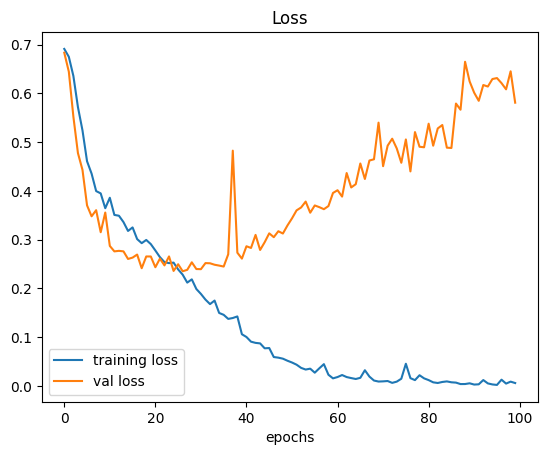

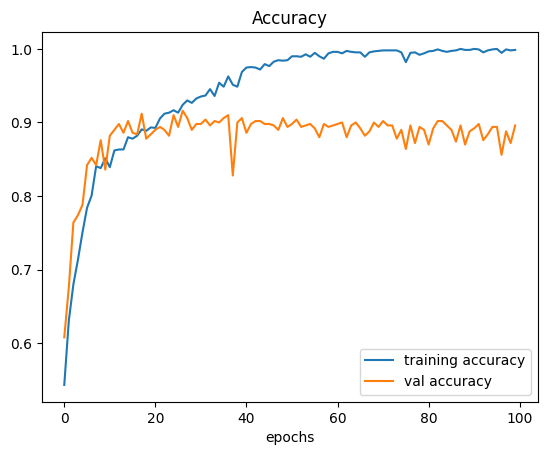

In [66]:
plot_loss(history_5)

We were overfitting with only the Conv2D layers so we added maxpool2d to each, then we were still overfitting so we added dropout layers to the fully connected layers. It appears that the longer the training went the less our model was generalizing. So lets try augmenting the data

In [10]:
train_datagen_augmented = ImageDataGenerator(rescale=1./255,
                                             rotation_range=0.2,
                                             shear_range=0.2,
                                             zoom_range=0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range=0.2,
                                             horizontal_flip=True)

#You should ONLY augment the training data so the model learns to generalize to make the test data easier to predict
train_data_augmented = train_datagen_augmented.flow_from_directory(directory=train_dir,
                                               batch_size=32,
                                               class_mode='binary',
                                               target_size=(224,224),
                                               seed=42)

Found 1500 images belonging to 2 classes.


In [69]:
tf.random.set_seed(42)

model_6 = Sequential([
    Conv2D(10, 3, activation='relu', strides=1, input_shape=(224,224,3)),
    MaxPool2D(2),
    Conv2D(32, 3, strides=1, activation='relu'),
    MaxPool2D(),
    Conv2D(64, 3, strides=2, activation='relu'),
    MaxPool2D(2),
    Conv2D(128, 3, strides=2, activation='relu'),
    MaxPool2D(),
    Flatten(),
    Dense(50,activation='relu'),
    Dense(100, activation='relu'),
    Dense(50, activation='relu'),
    Dense(1, activation='sigmoid')
])

model_6.compile(loss='binary_crossentropy',
                optimizer=Adam(learning_rate=.0001),
                metrics=['accuracy'])

history_6 = model_6.fit(train_data_augmented, epochs=50, steps_per_epoch=len(train_data_augmented), validation_data=valid_data, validation_steps=len(valid_data))

Epoch 1/50
47/47 [==============================] - 22s 419ms/step - loss: 0.6881 - accuracy: 0.5687 - val_loss: 0.6715 - val_accuracy: 0.7780
Epoch 2/50
47/47 [==============================] - 19s 414ms/step - loss: 0.6575 - accuracy: 0.6600 - val_loss: 0.5890 - val_accuracy: 0.7980
Epoch 3/50
47/47 [==============================] - 20s 429ms/step - loss: 0.5857 - accuracy: 0.7273 - val_loss: 0.4612 - val_accuracy: 0.8280
Epoch 4/50
47/47 [==============================] - 21s 452ms/step - loss: 0.5167 - accuracy: 0.7560 - val_loss: 0.3880 - val_accuracy: 0.8320
Epoch 5/50
47/47 [==============================] - 19s 414ms/step - loss: 0.4862 - accuracy: 0.7727 - val_loss: 0.3785 - val_accuracy: 0.8160
Epoch 6/50
47/47 [==============================] - 20s 429ms/step - loss: 0.4732 - accuracy: 0.7887 - val_loss: 0.4327 - val_accuracy: 0.8120
Epoch 7/50
47/47 [==============================] - 20s 432ms/step - loss: 0.4835 - accuracy: 0.7760 - val_loss: 0.3531 - val_accuracy: 0.8480

In [70]:
model_6.evaluate(valid_data)

16/16 [==============================] - 2s 108ms/step - loss: 0.2398 - accuracy: 0.9000


[0.23977228999137878, 0.8999999761581421]

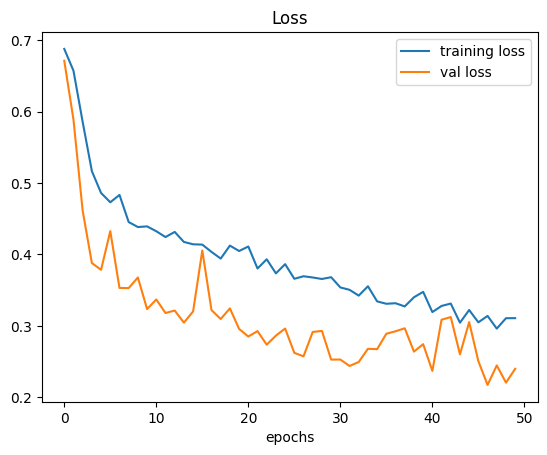

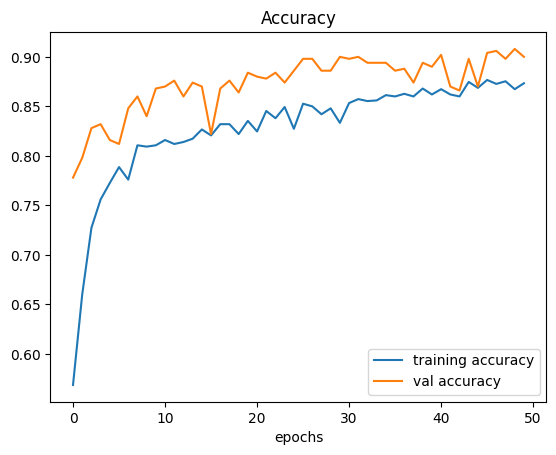

In [71]:
plot_loss(history_6)